In [2]:
import matplotlib .pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
np.random.seed(1)
x, y = sklearn.datasets.make_moons(200, noise = 0.20)

In [4]:
print(x.shape, y.shape)
# y=y.reshape((200,1))

(200, 2) (200,)


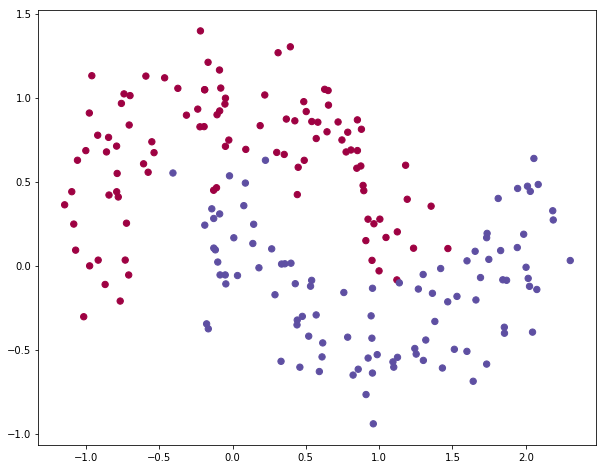

In [5]:
plt.scatter(x[:,0], x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)

In [6]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(x, y)

C:\Users\Guest\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [7]:
# N = 100 # number of points per class
# D = 2 # dimensionality
# K = 3 # number of classes
# X = np.zeros((N*K,D)) # data matrix (each row = single example)
# y = np.zeros(N*K, dtype='uint8') # class labels
# for j in range(K):
#   ix = range(N*j,N*(j+1))
#   r = np.linspace(0.0,1,N)#[::-1] # radius
# #   if j%2 == 0:
# #     r = r[::-1]
# #   print('R==============>',r)
# #   print(np.random.randn(N)*0.2)
#   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
# #   print('T===============>',t)
#   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#   y[ix] = j
# # lets visualize the data:
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.show()

In [8]:
# N = 100 # number of points per class
# D = 2 # dimensionality
# K = 3 # number of classes
# X = np.zeros((N*K,D)) # data matrix (each row = single example)
# y = np.zeros(N*K, dtype='uint8') # class labels
# for j in range(K):
#   ix = range(N*j,N*(j+1))
#   r = np.linspace(0.0,1,N)#[::-1] # radius
# #   if j%2 == 0:
# #     r = r[::-1]
# #   print('R==============>',r)
# #   print(np.random.randn(N)*0.2)
#   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
# #   print('T===============>',t)
#   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#   y[ix] = j
# # lets visualize the data:
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.show()

In [9]:
def plot_decision_boundary(pred_func, X, Y): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    print(X.shape, Y.shape, 'X & Y')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral) 

(200, 2) (200,) X & Y


Text(0.5, 1.0, 'Logistic Regression')

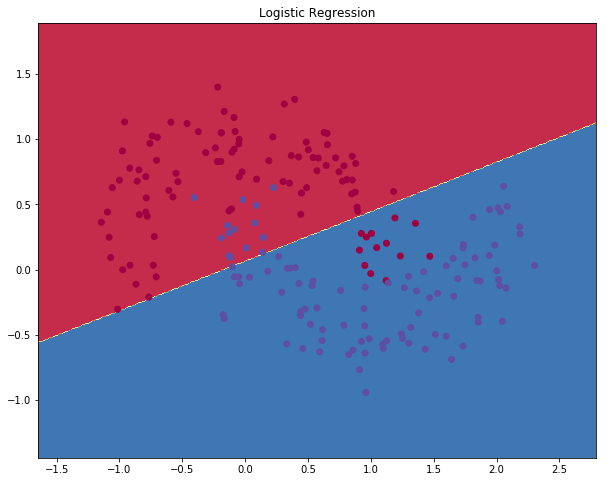

In [10]:
# print(x.shape, y.shape)
# print(clf.predict([[1,1]]))
# print(x[0])
plot_decision_boundary(lambda x:clf.predict(x), x, y)
plt.title("Logistic Regression")

In [11]:
# Print accuracy
print(x.shape, y.shape)
LR_predictions = clf.predict(x)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y, LR_predictions) + np.dot(1 - y,1 - LR_predictions)) / float(y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

(200, 2) (200,)
Accuracy of logistic regression: 86 % (percentage of correctly labelled datapoints)


In [12]:
x = x.T
y = y.reshape((-1, 200))
shape_X = x.shape
shape_Y = y.shape
m = y.shape[1]  # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 200)
The shape of Y is: (1, 200)
I have m = 200 training examples!


In [13]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(0)

0.5

In [14]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [15]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [16]:
def compute_cost(A2, Y, parameters):
    
    
    m = Y.shape[1] 
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [17]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
        
   
    A1 = cache['A1']
    A2 = cache['A2']
    
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [18]:
def update_parameters(parameters, grads, learning_rate=1.2):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [19]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    

    for i in range(0, num_iterations):
         
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
 
        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)
        
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [20]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

(2, 200) (1, 200)
Cost after iteration 0: 0.692995
Cost after iteration 1000: 0.090063
Cost after iteration 2000: 0.064688
Cost after iteration 3000: 0.056812
Cost after iteration 4000: 0.050300
Cost after iteration 5000: 0.044030
Cost after iteration 6000: 0.043814
Cost after iteration 7000: 0.042719
Cost after iteration 8000: 0.041756
Cost after iteration 9000: 0.040949
(200, 2)
(2, 148630) inside===
(4, 148630) z1
(4, 148630) a1
(1, 148630) z2
(1, 148630) exp_score
(1, 148630) probs
(148630,)
(200, 2) (200,) X & Y


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

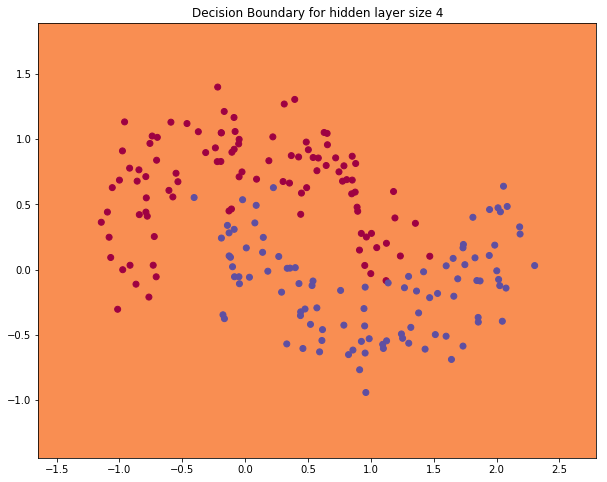

In [21]:
# Build a model with a n_h-dimensional hidden layer
print(x.shape, y.shape)
parameters = nn_model(x, y, n_h = 4, num_iterations=10000, print_cost=True)

# Plot the decision boundary
def predictX(model, x): 
    print(x.shape, 'inside===')
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation
#     z1 = x.dot(W1) + b1 
    z1 = W1.dot(x) + b1
    print(z1.shape, 'z1')
    a1 = np.tanh(z1) 
    print(a1.shape, 'a1')
#     z2 = a1.dot(W2) + b2 
    z2 = W2.dot(a1) + b2
    print(z2.shape, 'z2')
    exp_scores = np.exp(z2) 
    print(exp_scores.shape, 'exp_score')
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    print(probs.shape, 'probs')
    print(np.argmax(probs, axis=0).shape)
    return np.argmax(probs, axis=0)
#     return probs
print(x.T.shape)
plot_decision_boundary(lambda x: predictX(parameters, x.T), x.T, y.reshape((200,)))
plt.title("Decision Boundary for hidden layer size " + str(4))

In [22]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

NameError: name 'X' is not defined

# Bibliography:
    http://cs231n.github.io/neural-networks-case-study/
    https://github.com/dennybritz/nn-from-scratch/blob/master/nn_from_scratch.py

